In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
%matplotlib inline

In [2]:
R_earth = 6.371e6 # Earth Mean rad, in m
g_0 = 9.80665 # earth standard gravity, in m/s**2

def alt(x,y): #altitude above sea level
    return np.sqrt(x**2+y**2) - R_earth

def lon(x,y): # 2D from north pole down, @equator
    return np.arctan2(y,x)

def grav(x,y):
    assert alt(x,y) >= 0, 'must be @ or above sea level'
    h = alt(x,y)
    phi=lon(x,y)
    #print phi
    g_h = g_0*(R_earth/(R_earth+h))**2
    
    return np.array([g_h*np.cos(phi), g_h*np.sin(phi)])

    
mag = lambda x: np.sqrt(x.dot(x))
print grav(0., R_earth)

[  6.00484127e-16   9.80665000e+00]


In [6]:
def T_w(t,g): #thrust:weight ratio, given (time,gravity)
        
        Isp = 304  # sec
        v_e = g*Isp  # average exhaust speed
        # dV = 4550  # m/s for kerbin low orbit
        
        #F = 18900000. #N
        
        m0 = 130000. #kg
        
#         mf0 = 2502017*.845 # kg, very specific init. fuel mass
#         dmf = 13000.  # kg/s burn rate (constant here) 
        mf0 = 0. # kg, very specific init. fuel mass
        dmf = 0.  # kg/s burn rate (constant here) 
        
        F = dmf*v_e  #thrust = m_dot*exhaust
        
        m_t = m0 + (mf0-dmf*t) # total mass @ time 
        #dmf = 80. #kg/s
        
        if (m_t<=m0): # or (t>405):
            F=0.  # no more fuel
            m_t=m0 
        
        #print 'total mass--',m_t
        
        #print 'T:W ratio--',F/(m_t*g)
        return F/(m_t*g)

$${dv\over dt}=-\frac{GM}{r^2}\sin\gamma-\frac{D}{m}$$
$${d\gamma\over dt}={1\over r}{\left(v-\frac{GM }{r v}\right)\cos\gamma}+\frac{L}{m v}$$
$${dr\over dt}=v\sin\gamma$$
$${d\phi\over dt}=\frac{v}{r}\cos\gamma$$

In [39]:
G = 6.672e-11 # Gravitational Constant
M = 5.97219e24 # Mass of Earth 
#M = 5.2915793e22 #Mass of Kerbin
#R = 6e5 #Radius of Kerbin
R= 6.378e6 # mean Radius of Earth

def g(y,t):
    
    V_i = y[0]
    gam_i=y[1]
    r_i = y[2]
    phi_i = y[3]
    
    #assert r_i>=R, 'You have crashed'
    g = G*M/r_i**2
    
    
    f_v = -g*(np.sin(gam_i) - T_w(t,g))
    f_gam=(V_i/r_i - g/V_i)*np.cos(gam_i) # + drag/ ortho. term, not used 
    f_r = V_i*np.sin(gam_i) # 
    f_phi = (V_i/r_i)*np.cos(gam_i)
    #print 'time--',t
    #print gam_i
    return [f_v, f_gam, f_r, f_phi]

# V0=  50  # m/s
# gam0=np.pi/2.-0.1 # not quite vertical
# r_0 = R+ 2.86875e2 # 1/4 km up
# phi0 = -1.5  # close to the bottom
# g0=[V0, gam0, r_0, phi0]  # set init. cond. 
# t=np.linspace(0,7000,10000) # 7000 secs, 10e3 steps

V0 =  7897.  # m/s
gam0 = 0.5 # not quite vertical
r_0 = 6391103.4504 # 1/4 km up
phi0 = -1.5  # close to the bottom
g0=[V0, gam0, r_0, phi0]  # set init. cond. 
t=np.linspace(0,7000,10000) # 7000 secs, 10e3 steps

soln=odeint(g, g0, t) #[]

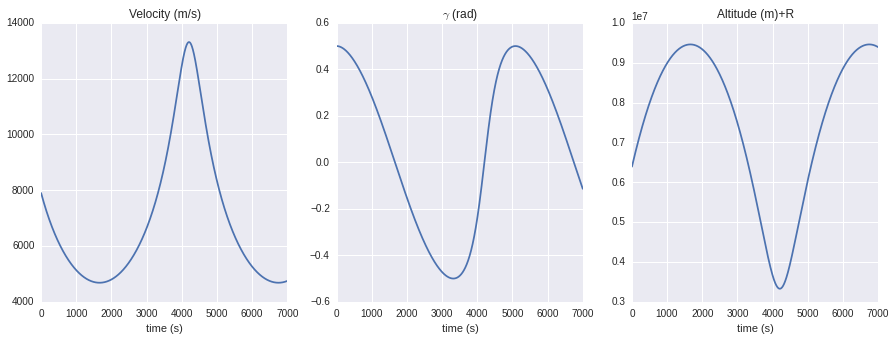

In [40]:
labels=['Velocity (m/s)', r'$\gamma$ (rad)','Altitude (m)+R'] 
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i,n in enumerate(ax.flatten()[:3]):
    n.plot(t,soln[:,i])
    n.set_title(labels[i])
    n.set_xlabel('time (s)')
#ax.flatten()[-1].plot(t,soln[:,2]-R_earth)

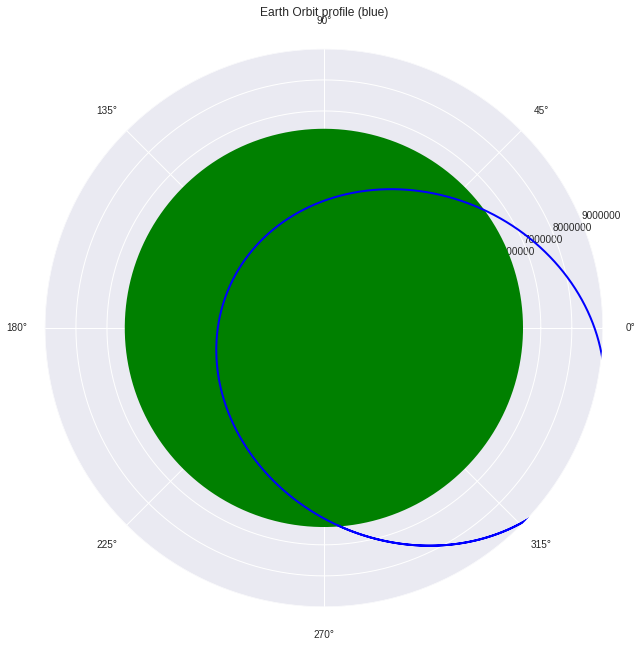

In [41]:
fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, polar=True) 

ax1.plot(np.linspace(0,2*np.pi, 10000),R*np.ones(10000), linewidth=3, color='g')
ax1.fill_betweenx(R*np.ones(10000), np.linspace(0,2*np.pi, 10000), color='g')
ax1.plot(soln[:,3], soln[:,2], linewidth=2, color='b')
ax1.set_ylim(1e4,9e6)
ax1.set_title('Earth Orbit profile (blue)')

In [12]:
soln[:,2]

array([ 6378286.875     ,  6378323.51263803,  6378363.78241168, ...,
        6496108.16943456,  6496152.08807687,  6496195.98843371])

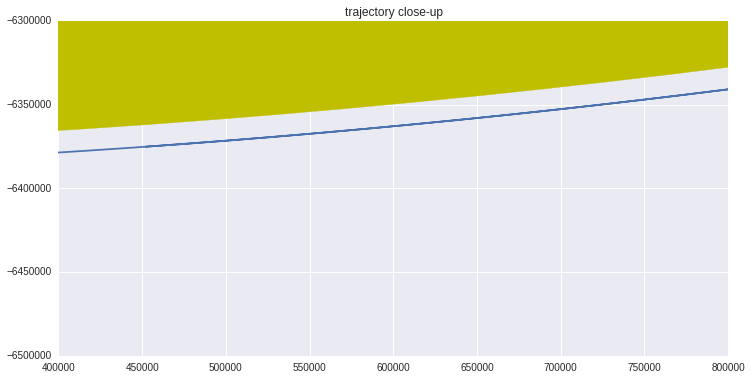

In [35]:
circle1=plt.Circle((0,0),R,color='y')

x=np.multiply(soln[:,2], np.cos(soln[:,3]))
y=np.multiply(soln[:,2], np.sin(soln[:,3]))
plt.plot(x, y)
plt.xlim(.4e6,.8e6)
plt.ylim(-6.5e6, -6.3e6)
fig = plt.gcf()
fig.set_size_inches(12, 6)
fig.gca().add_artist(circle1)
plt.title('trajectory close-up')

In [14]:
x=np.array([0,1,1,2])
np.where(x<0)[0].size==0

True